 # Mohsin Bin Ramzan F22607016  


#  CNN & transfer learning

### Import Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os

Download The Dataset

In [2]:
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [3]:
list(data_dir.glob('*'))


[PosixPath('/root/.keras/datasets/flower_photos/sunflowers'),
 PosixPath('/root/.keras/datasets/flower_photos/roses'),
 PosixPath('/root/.keras/datasets/flower_photos/dandelion'),
 PosixPath('/root/.keras/datasets/flower_photos/LICENSE.txt'),
 PosixPath('/root/.keras/datasets/flower_photos/daisy'),
 PosixPath('/root/.keras/datasets/flower_photos/tulips')]

Let's inspect the dataset and show some samples.

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


No of roses: 641


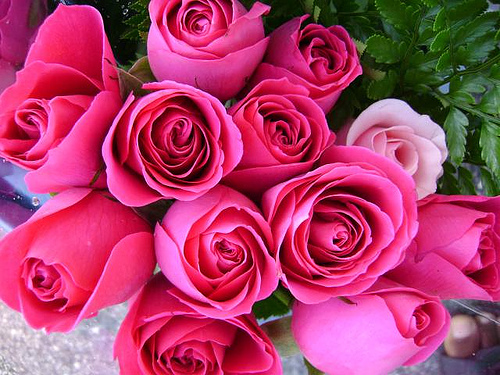

In [5]:
roses = list(data_dir.glob('roses/*'))
print(f"No of roses: {len(roses)}")
PIL.Image.open(str(roses[2]))

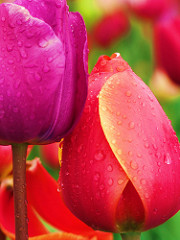

In [6]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[4]))

Some fixed parameters for the dataset loading.

In [7]:
batch_size = 32
d1 = 160
d2 = 160

In [8]:
seed = 40

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=seed,
  image_size=(d1, d2),
  batch_size=batch_size)

validation_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=seed,
  image_size=(d1, d2),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## Visualize the data


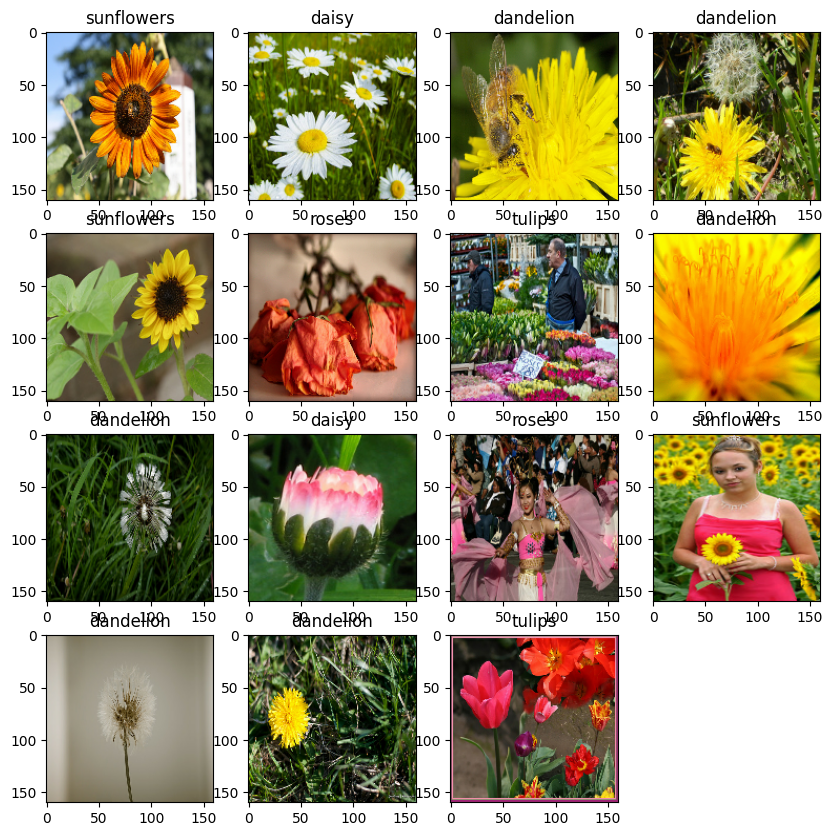

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(15):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("on")

## Create the convolutional model

In [11]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.models import Model
def get_model(input_shape):
    x = Input(shape=input_shape)
    r = Rescaling(1./255)(x)
    c1 = Conv2D(16, 3, padding='same', activation='relu')(r)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = Conv2D(32, 3, padding='same', activation='relu')(p1)
    p2 = MaxPooling2D((2, 2))(c2)
    c3 = Conv2D(64, 3, padding='same', activation='relu')(p2)
    p3 = MaxPooling2D((2, 2))(c3)
    f = Flatten()(p3)
    d1 = Dense(128, activation='relu')(f)
    d2 = Dense(num_classes)(d1)
    model = Model(x, d2)
    model.summary()
    return model

model = get_model((d1, d2, 3))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 160, 160, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 80, 80, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 80, 80, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 40, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,301,157 (12.59 MB)

 Trainable params: 3,301,157 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [12]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy',])

### Train the model

In [13]:
print(train_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 160, 160, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

history = model.fit(train_ds, epochs=11, validation_data = validation_ds)

Epoch 1/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 195ms/step - accuracy: 0.3315 - loss: 1.6252 - val_accuracy: 0.5354 - val_loss: 1.1524
Epoch 2/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 77ms/step - accuracy: 0.5868 - loss: 1.0366 - val_accuracy: 0.5913 - val_loss: 1.0310
Epoch 3/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6662 - loss: 0.8796 - val_accuracy: 0.6008 - val_loss: 1.0277
Epoch 4/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.7289 - loss: 0.7153 - val_accuracy: 0.6240 - val_loss: 1.0766
Epoch 5/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.8026 - loss: 0.5355 - val_accuracy: 0.6294 - val_loss: 1.2676
Epoch 6/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.8602 - loss: 0.3885 - val_accuracy: 0.6131 - val_loss: 1.3005
Epoch 7/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.9262 - loss: 0.2376 - val_accuracy: 0.6267 - val_loss: 1.4961
Epoch 8/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.9532 - loss: 0.1464 - val_accuracy: 0.592

inspection of results

In [15]:
def display_history(history):
    mse_training = history.history['loss']
    acc_training = history.history['accuracy']

    mse_val = history.history['val_loss']
    acc_val = history.history['val_accuracy']
    plt.plot(mse_training)
    plt.plot(mse_val)
    plt.grid()
    plt.title('Loss during training')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'])
    plt.axis('On')
    plt.show()
    # Accuracy
    plt.plot(acc_training)
    plt.plot(acc_val)
    plt.grid()
    plt.title('Accuracy during training')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'])
    plt.axis('On')
    plt.show()

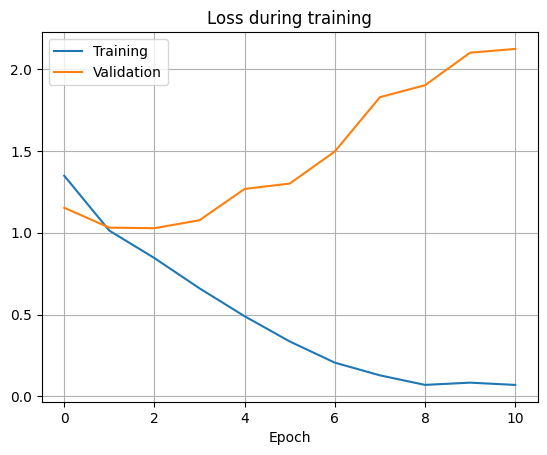

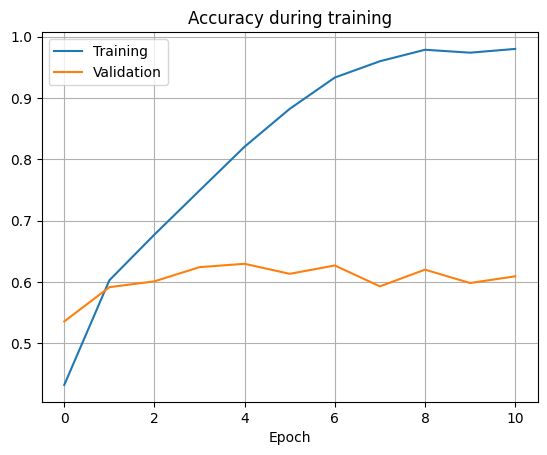

In [16]:
display_history(history)

## Overfitting elimination techniques
by Data augmentation

In [17]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# lambda -->  anonymous function that takes input_shape as an argument and returns a Keras Sequential model
data_augmentation = lambda input_shape: tf.keras.Sequential([
    RandomFlip("horizontal", input_shape=input_shape),
    RandomRotation(0.2),
    RandomZoom(0.2),
  ]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


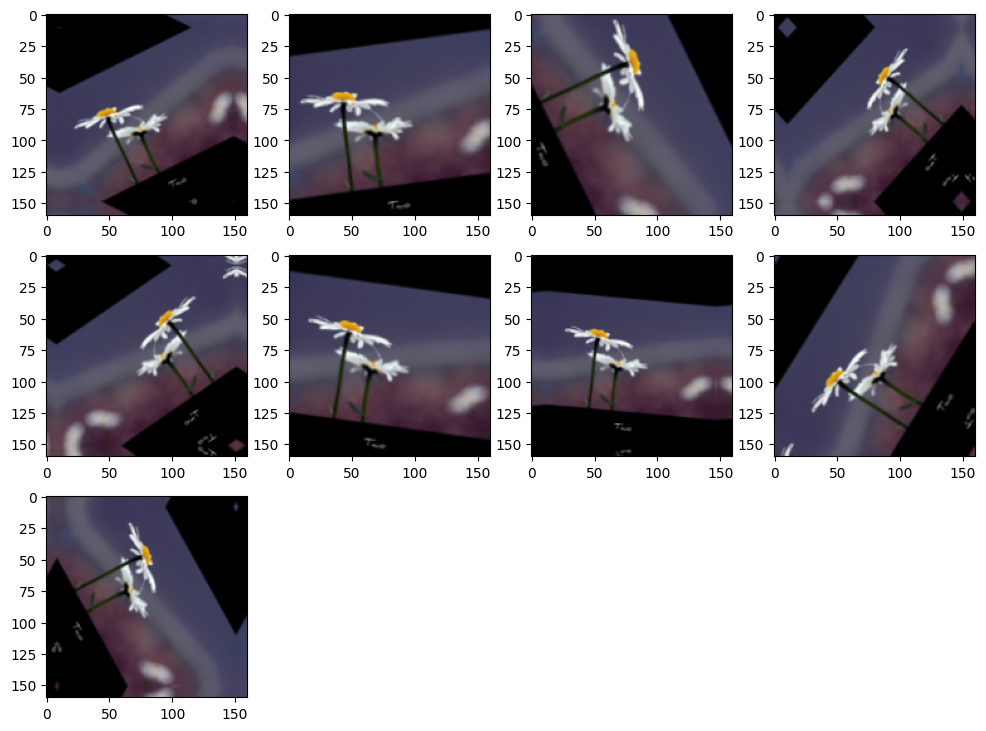

In [18]:
plt.figure(figsize=(12, 12))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = (data_augmentation((d1, d2, 3)))(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("on")

### Dropout


In [19]:
from tensorflow.keras.layers import Dropout

def get_enhanced_model(input_shape):
    x = Input(shape=input_shape)

    augmented = (data_augmentation(input_shape))(x)

    r = Rescaling(1./255)(augmented)

    c1 = Conv2D(16, 3, padding='same', activation='relu')(r)
    p1 = MaxPooling2D((2, 2))(c1)
    c2 = Conv2D(32, 3, padding='same', activation='relu')(p1)
    p2 = MaxPooling2D((2, 2))(c2)
    c3 = Conv2D(64, 3, padding='same', activation='relu')(p2)
    p3 = MaxPooling2D((2, 2))(c3)
    d = Dropout(.2)(p3)
    f = Flatten()(d)
    d1 = Dense(128, activation='relu')(f)
    d2 = Dense(num_classes)(d1)

    model = Model(x, d2)

    model.summary()

    return model

model = get_enhanced_model((d1, d2, 3))

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_9 (Sequential)            │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 160, 160, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 80, 80, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 80, 80, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 40, 40, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 40, 40, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 20, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,276,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,301,157 (12.59 MB)

 Trainable params: 3,301,157 (12.59 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
callback = EarlyStopping(monitor="val_accuracy",
    mode = "max",
    min_delta=0.003,
    patience=3,
    restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_ds, epochs=15, validation_data = validation_ds, callbacks = [callback])

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.3475 - loss: 1.5834 - val_accuracy: 0.4959 - val_loss: 1.2121
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.5387 - loss: 1.1214 - val_accuracy: 0.6104 - val_loss: 1.0334
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - accuracy: 0.6220 - loss: 0.9755 - val_accuracy: 0.6090 - val_loss: 0.9889
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.6276 - loss: 0.9428 - val_accuracy: 0.6144 - val_loss: 1.0018
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - accuracy: 0.6541 - loss: 0.8905 - val_accuracy: 0.5981 - val_loss: 1.0160
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.6762 - loss: 0.8457 - val_accuracy: 0.6444 - val_loss: 0.9628
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.6821 - loss: 0.8314 - val_accuracy: 0.6553 - val_loss: 0.9054
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - accuracy: 0.7073 - loss: 0.7811 - val_accuracy: 0.6662 -

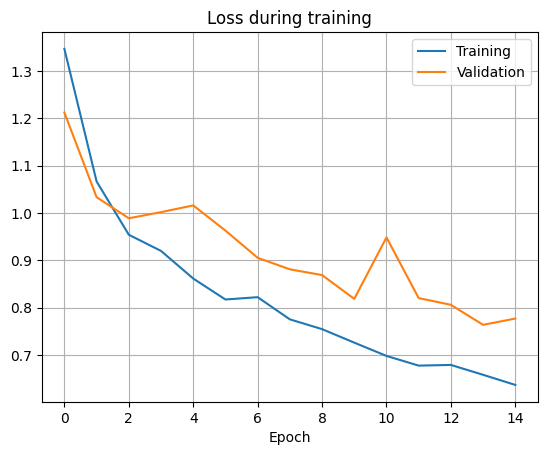

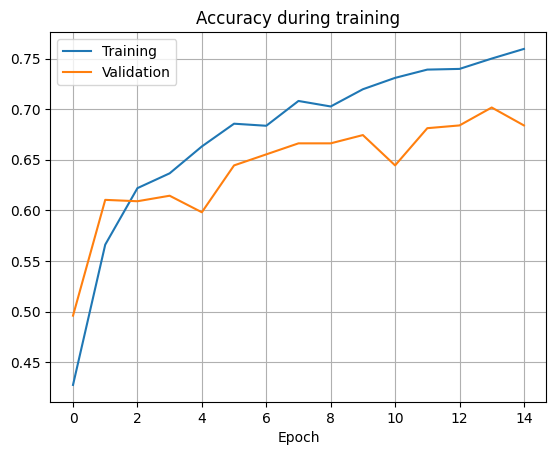

In [21]:
display_history(history)

In [22]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(d1, d2)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

117948/117948 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
This image most likely belongs to sunflowers with a 43.18 percent confidence.


## Transfer learning and fine tuning

# Building MobileNet model

In [23]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(d1, d2, 3),
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [24]:

base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 160, 160, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

## Feature extraction

In [25]:
base_model.trainable = False

In [26]:
base_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12            │ (None, 160, 160, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer_12[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

 classification head layer

In [27]:
from tensorflow.keras.layers import GlobalAveragePooling2D

def get_t_l_model(input_shape):
  input = tf.keras.Input(shape=input_shape)
  aug = (data_augmentation(input_shape))(input)
  r = Rescaling(1./127.5, offset=-1)(aug)
  m_n = base_model(r, training = False)
  gap = GlobalAveragePooling2D()(m_n)
  d = Dropout(0.2)(gap)
  out = Dense(num_classes)(d)
  model = tf.keras.Model(input, out)
  model.summary()
  return model

model = get_t_l_model((d1, d2, 3))

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_10 (Sequential)           │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 160, 160, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_160 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │           6,405 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,264,389 (8.64 MB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [28]:
starting_lr = 1e-4
initial_epochs = 11

model.compile(optimizer=Adam(learning_rate=starting_lr),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=['accuracy'])

history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=validation_ds)

Epoch 1/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 93ms/step - accuracy: 0.2412 - loss: 1.9230 - val_accuracy: 0.4278 - val_loss: 1.3997
Epoch 2/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - accuracy: 0.4360 - loss: 1.3817 - val_accuracy: 0.6049 - val_loss: 1.0948
Epoch 3/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.5794 - loss: 1.0777 - val_accuracy: 0.6744 - val_loss: 0.9144
Epoch 4/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.6457 - loss: 0.9225 - val_accuracy: 0.7248 - val_loss: 0.8049
Epoch 5/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.7038 - loss: 0.8202 - val_accuracy: 0.7452 - val_loss: 0.7297
Epoch 6/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.7293 - loss: 0.7598 - val_accuracy: 0.7657 - val_loss: 0.6730
Epoch 7/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.7565 - loss: 0.6784 - val_accuracy: 0.7916 - val_loss: 0.6268
Epoch 8/11
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.7654 - loss: 0.6607 - val_accuracy: 0.7984

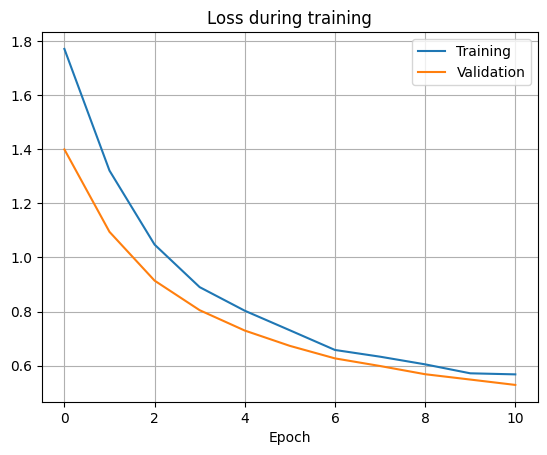

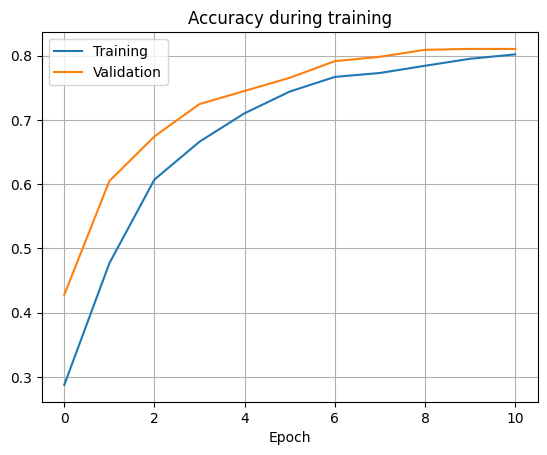

In [29]:
display_history(history)

## Fine tuning



In [30]:
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


### Compile the model



In [31]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=starting_lr/10),
              metrics=['accuracy'])

In [32]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_ds)

Epoch 11/21
92/92 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.6869 - loss: 0.8099 - val_accuracy: 0.8283 - val_loss: 0.4659
Epoch 12/21
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.7677 - loss: 0.6075 - val_accuracy: 0.8420 - val_loss: 0.4294
Epoch 13/21
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 0.8145 - loss: 0.5149 - val_accuracy: 0.8406 - val_loss: 0.4031
Epoch 14/21
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.8493 - loss: 0.4604 - val_accuracy: 0.8460 - val_loss: 0.3880
Epoch 15/21
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.8518 - loss: 0.4225 - val_accuracy: 0.8447 - val_loss: 0.3693
Epoch 16/21
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.8477 - loss: 0.4000 - val_accuracy: 0.8651 - val_loss: 0.3554
Epoch 17/21
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8709 - loss: 0.3659 - val_accuracy: 0.8706 - val_loss: 0.3401
Epoch 18/21
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.8731 - loss: 0.3562 - val_accuracy

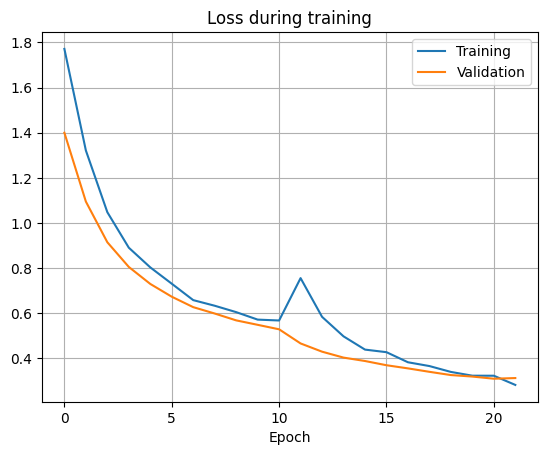

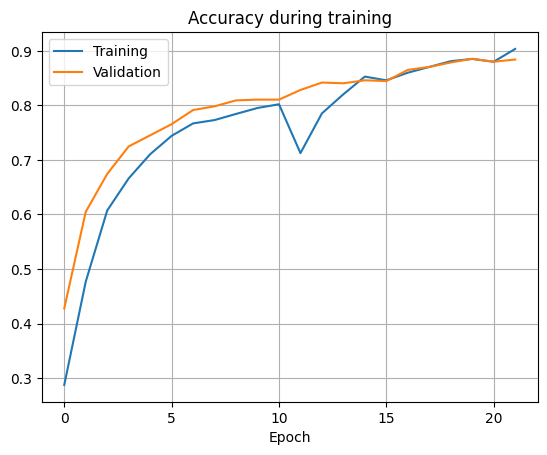

In [33]:
history.history['accuracy'] += history_fine.history['accuracy']
history.history['val_accuracy'] += history_fine.history['val_accuracy']

history.history['loss'] += history_fine.history['loss']
history.history['val_loss'] += history_fine.history['val_loss']

display_history(history)

TASKS
1. Create New models with your own classifiers and based model of 100 and 25 trainable layers.
2. Train and validate the models
3. Plot graphs
4. Make inference of 2 images (from test dataset) from each of the trained models.
5. Analyze the results of all 4 models (2 already developed above in the class and 2 developed by you in the home task).
6. Note: Use of AI tools will lead to 0 mark.

Task

Model with 100 Trainable

In [36]:
# MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(input_shape=(d1, d2, 3), include_top=False, weights='imagenet')

# Seting the top 100 layers trainable
for layer in base_model.layers[:100]:
    layer.trainable = False

# Defining the model
def get_model_100(input_shape):
    input = Input(shape=input_shape)
    aug = Rescaling(1./127.5, offset=-1)(input)
    base_out = base_model(aug)
    gap = GlobalAveragePooling2D()(base_out)
    d = Dropout(0.2)(gap)
    output = Dense(num_classes)(d)
    model = Model(input, output)
    return model




In [40]:
# Compile and train
from tensorflow.keras.optimizers import RMSprop

model_100 = get_model_100((d1, d2, 3))
model_100.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [41]:
history_100 = model_100.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 40s 243ms/step - accuracy: 0.6701 - loss: 0.8488 - val_accuracy: 0.7698 - val_loss: 0.6810
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - accuracy: 0.9387 - loss: 0.1837 - val_accuracy: 0.7861 - val_loss: 0.7067
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.9761 - loss: 0.0822 - val_accuracy: 0.8161 - val_loss: 0.5729
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.9969 - loss: 0.0277 - val_accuracy: 0.8147 - val_loss: 0.6490
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 0.9965 - loss: 0.0186 - val_accuracy: 0.8447 - val_loss: 0.5582
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.9956 - loss: 0.0127 - val_accuracy: 0.8719 - val_loss: 0.4763
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - accuracy: 0.9966 - loss: 0.0135 - val_accuracy: 0.8856 - val_loss: 0.4377
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.9969 - loss: 0.0075 - val_accuracy: 0.871

# Model with 25 Trainable Layers

In [42]:
# Set top 25 layers trainable
for layer in base_model.layers[:-25]:
    layer.trainable = False

# Define the model
def get_model_25(input_shape):
    input = Input(shape=input_shape)
    aug = Rescaling(1./127.5, offset=-1)(input)
    base_out = base_model(aug)
    gap = GlobalAveragePooling2D()(base_out)
    d = Dropout(0.2)(gap)
    output = Dense(num_classes)(d)
    model = Model(input, output)
    return model

In [43]:

# Compile and train
model_25 = get_model_25((d1, d2, 3))
model_25.compile(optimizer=RMSprop(learning_rate=1e-4),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=['accuracy'])

In [44]:
history_25 = model_25.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step - accuracy: 0.8756 - loss: 0.4060 - val_accuracy: 0.8924 - val_loss: 0.3259
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.9950 - loss: 0.0211 - val_accuracy: 0.8869 - val_loss: 0.4054
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.9998 - loss: 0.0054 - val_accuracy: 0.8597 - val_loss: 0.5693
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.8774 - val_loss: 0.4951
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8815 - val_loss: 0.4762
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 77ms/step - accuracy: 0.9989 - loss: 0.0025 - val_accuracy: 0.8965 - val_loss: 0.4539
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 1.0000 - loss: 8.8025e-04 - val_accuracy: 0.8978 - val_loss: 0.4795
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 

# **6.  Visualization of Performance**

In [60]:
def plot_history(histories, labels):
    plt.figure(figsize=(12, 6))
    for history, label in zip(histories, labels):
        print(f"Plotting {label}:")
        print(f"Training accuracy: {history.history.get('accuracy', 'Not found')}")
        print(f"Validation accuracy: {history.history.get('val_accuracy', 'Not found')}")
        if 'accuracy' in history.history:
            plt.plot(history.history['accuracy'], label=f'{label} Training Accuracy')
        if 'val_accuracy' in history.history:
            plt.plot(history.history['val_accuracy'], label=f'{label} Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()


In [51]:
import glob

# Locate JPEG files in the extracted dataset
test_image_paths = glob.glob(os.path.join(data_dir, '*/*.jpg'))
test_images = [test_image_paths[0], test_image_paths[1]]

print("Selected test images:", test_images)


Selected test images: ['/root/.keras/datasets/flower_photos/sunflowers/5966729883_67f4fede93.jpg', '/root/.keras/datasets/flower_photos/sunflowers/4932144003_cbffc89bf0.jpg']


Inference and the analysis

In [65]:
def infer_image(img_path, model, label):
    img = tf.keras.utils.load_img(img_path, target_size=(d1, d2))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    predicted_index = np.argmax(score)
    if predicted_index < len(class_names):
        print(f"{label}: {class_names[predicted_index]} with {100 * np.max(score):.2f}% confidence")
    else:
        print(f"{label}: Unknown class with {100 * np.max(score):.2f}% confidence")

# Perform inference on selected test images
for img_path in test_images:
    print(f"Testing on image: {img_path}")
    infer_image(img_path, base_model, "Base Model")

    infer_image(img_path, model_100, "100 Trainable Layers")
    infer_image(img_path, model_25, "25 Trainable Layers")


Testing on image: /root/.keras/datasets/flower_photos/sunflowers/5966729883_67f4fede93.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Base Model: Unknown class with 10.82% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
100 Trainable Layers: sunflowers with 100.00% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
25 Trainable Layers: sunflowers with 100.00% confidence
Testing on image: /root/.keras/datasets/flower_photos/sunflowers/4932144003_cbffc89bf0.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Base Model: Unknown class with 13.93% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
100 Trainable Layers: sunflowers with 100.00% confidence
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
25 Trainable Layers: sunflowers with 100.00% confidence
